# Long Short Term Memory (LSTM) prediction method for stock pricing of Apple, using 60 days of data

In [19]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf

In [20]:
df = yf.download('AAPL', start='2012-01-01', end='2019-12-18')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519280,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586557,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726295,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859334,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838939,394024400
...,...,...,...,...,...,...
2019-12-11,67.202499,67.775002,67.125000,67.692497,66.316811,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.485809,137310400
2019-12-13,67.864998,68.824997,67.732498,68.787498,67.389572,133587600


In [21]:
# Get the number of rows and columns in the data set
df.shape

(2003, 6)

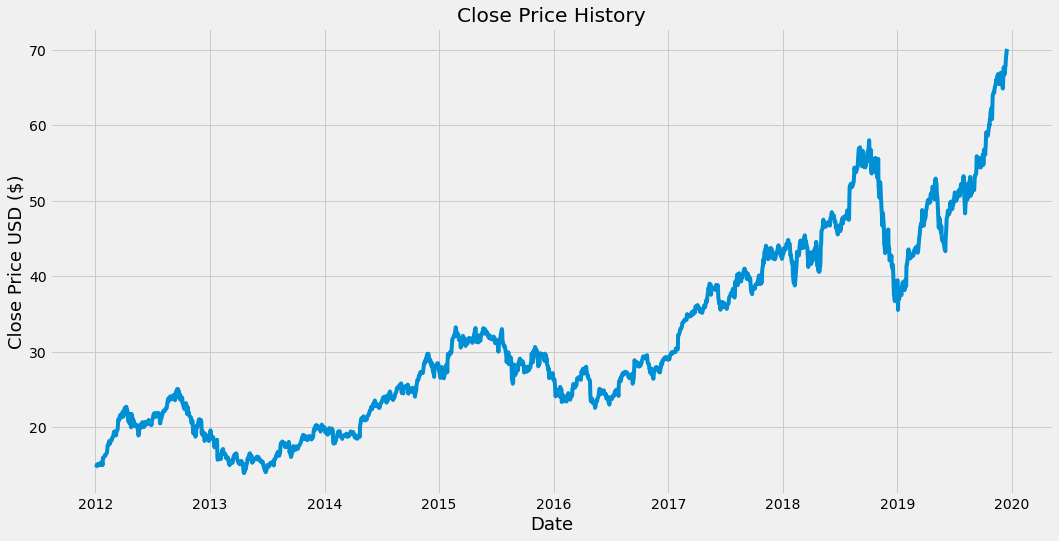

In [22]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [23]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

training_data_len

1603

In [24]:
# Scale the all of the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [25]:
# Create the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]

# Split the data into x_train and y_train data sets
x_train=[]
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [26]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
# Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [28]:
# Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [29]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 24s 14ms/step - loss: 7.7761e-04


In [31]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , : ]
# Create the data sets x_test and y_test
x_test = []
y_test =  dataset[training_data_len : , : ] # Get all of the rows from index 1543 to 2003

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [32]:
# Convert x_test to a numpy array
x_test = np.array(x_test)

In [33]:
# Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1 ))

In [34]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)#Undo scaling

13/13 [==============================] - 1s 9ms/step


In [35]:
# Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1.6534459483166795

<ipython-input-37-48032f6f44f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


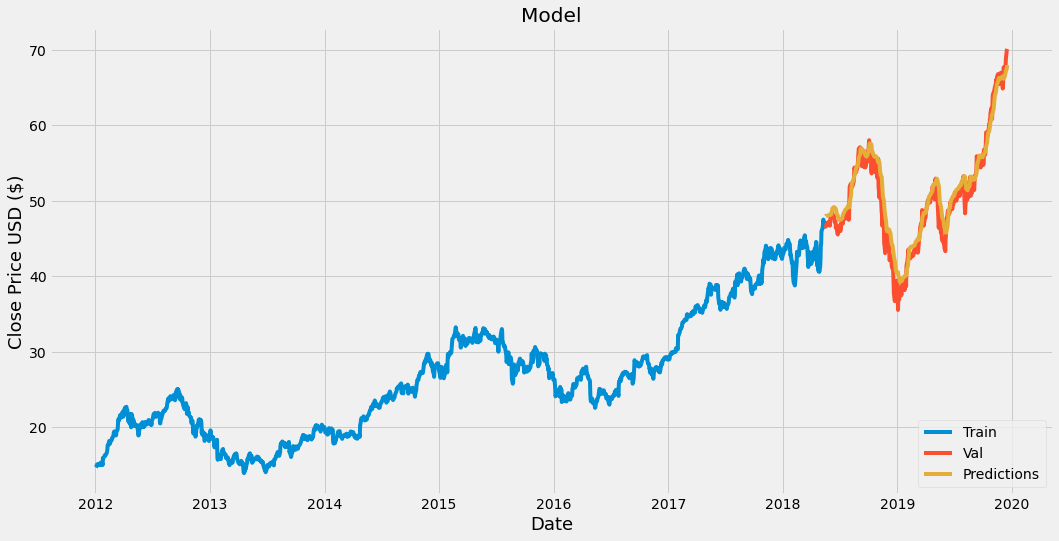

In [37]:
# Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [38]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,47.967903
2018-05-18,46.577499,48.010590
2018-05-21,46.907501,47.994068
2018-05-22,46.790001,47.995724
2018-05-23,47.090000,47.989452
...,...,...
2019-12-11,67.692497,66.704063
2019-12-12,67.864998,66.928108
2019-12-13,68.787498,67.163513


In [39]:
# Get the quote
apple_quote = yf.download('AAPL', start='2012-01-01', end='2019-12-18')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 18ms/step
[[68.438354]]


In [43]:
# Get the quote
apple_quote2 = yf.download('AAPL', start='2019-12-19', end='2019-12-20')
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2019-12-19    70.004997
Name: Close, dtype: float64
